import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### This is a single perceptron model that DOES NOT use PyTorch!

Propagation and optimization functions are the same as slideshow, except our activation function is not a sigmoid but a unit step (so we ignore its derivative).

In [477]:
def forward_propagation(x, y, weights, bias): 
    """
    x: training data as a vector (nparray), where each value corresponds
        to a feature's value
    y: label (0 or 1)
    weights: weights of the perceptron
    bias: bias
    """
    y_pred = predict(x, weights, bias)
    loss = (y_pred - y)**2   
    d_loss = 2*(y_pred - y)
    
    return y_pred, loss, d_loss

In [579]:
def optimize_perceptron(x, y, learning_rate,  maxEpochs, ):
    """
    Optimizes the Perceptron's weights by looping over the same steps for the specified number of epochs.
    Steps:
    1. Forward propagate data point
    2. Backpropagate
    3. Update weights
    4. Check stop conditions while looping
    """
    epoch = 0
    error = 999
    weights = np.random.rand(x.shape[1])
    bias = np.random.rand()
    
    errors = list()
    epochs = list()
    
    # Loop until stop conditions are met
    while (epoch <= maxEpochs) and (error > 9e-4):
        
        loss_ = 0
        # Loop over every data point
        for i in range(x.shape[0]):
            
            # Forward Propagation on each data point
            y_pred, loss, d_loss = forward_propagation(x[i], y[i], weights, bias)

            # Backpropagation
            partial_derivates = backpropagation(x[i], d_loss)
            
            # Learn by updating the weights of the perceptron
            weights = weights - (learning_rate * np.array(partial_derivates))

        # Evaluate the results
        for index, feature_value_test in enumerate(x):
            y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
            loss_ += loss

        errors.append(loss_/len(x))
        epochs.append(epoch)
        error = errors[-1]
        epoch += 1

        print('Epoch {}. loss: {}'.format(epoch, errors[-1]))

    
    return weights, bias, errors

In [578]:
def activation_function(prediction):
    """
    Receives the output of the perceptron's function as parameter, and applies the
    activation function on it.
    In this simple model, the activation function is a unit step which classifies
    negative inputs as 0 and positive inputs as 1.
    """
    if prediction >= 0:
        return 1
    return 0
  

def predict(x, weights, bias):
    """
    Predicts the class of a given data point (x) by running the input through 
    the neuron (dot product) and then applying the activation function.
    """
    prediction = np.dot(weights, x) + bias
    prediction = activation_function(prediction)
    
    return (prediction)

In [480]:
def backpropagation(x, d_loss):
    """
    Performs the Backpropagation step on a given data point.
    Receives as input the data point, the Perceptron's weights and the partial derivative of the loss
    over the predicted y.
    The received derivative is used to calculate the partial derivative of the loss over the weight of each feature.
    A list with the partial derivatives of the loss over each weight is returned.
    """
    partial_derivates = list()
    for feature_value in x:
        partial_derivates.append(d_loss*feature_value)
        
    return partial_derivates   

### Formatting our Data

In [615]:
data = pd.read_csv('data_mnist.zip')

# Take only data with labels 1
data_ones = data[data['label'] == 1]

# Take only data with labels 0
data_zeros = data[data['label'] == 0]

# If you want to change either digit, just change the label value to either a 0 or a 1 so the math works out
# Ex. data_zeros = data[data['label'] == 7]
#     data_zeros['label'] = 0

# Concatenate instances with label 0 and 1
data = pd.concat([data_ones, data_zeros])
print(data.shape)
print(np.unique(data['label'].to_numpy()))

# # Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('label', axis=1).to_numpy()
x_test = test_data.drop('label', axis=1).to_numpy()
y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Rescale data points to values between 0 and 1 (pixels are originally 0-255)
x_train = x_train / 255.
x_test = x_test / 255.

(8816, 785)
[0 1]
(6612, 784)
(2204, 784)
(6612,)
(2204,)


In [581]:
def shrinkdata(data, res):
    """
    Reformats the input data at a lower resolution.
    data: Our input data matrix
    res:  The resolution (must be a factor of 28)
    """
    data = data[0:].reshape([data.shape[0], 28, 28])
    data = data.reshape(data.shape[0], res, int(28 / res), res, int(28 / res)).sum(axis=2).sum(axis=3)
    data = data / ((28 / res)**2)
    data = data[0:].reshape(data.shape[0], res**2)
    return data

def shrinkpoint(data, res):
    """
    Same as shrinkdata, but for a single 784 pixel image
    """
    data = data.reshape([28, 28])
    data = data.reshape(res, int(28 / res), res, int(28 / res)).sum(axis=1).sum(axis=2)
    data = data / ((28 / res)**2)
    data = data.reshape(res**2)
    return data

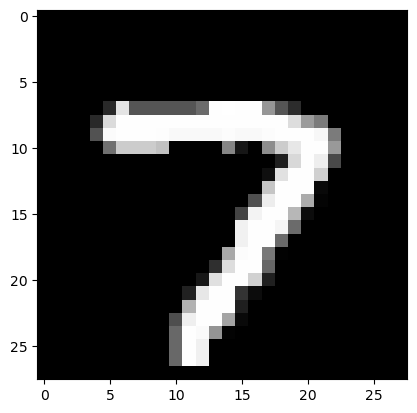

In [596]:
plt.imshow(x_train[205].reshape([28, 28]), cmap='Greys_r')

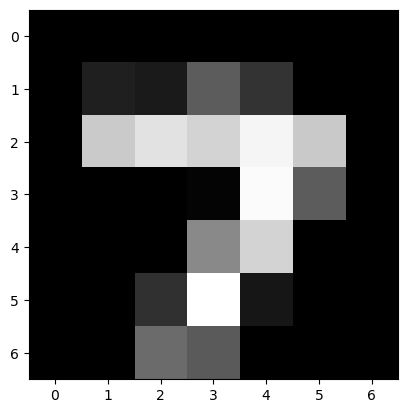

In [608]:
resolution = 7 # 4x4 image resolution
x_train_shrunk = shrinkdata(x_train, resolution)
x_test_shrunk = shrinkdata(x_test, resolution)

plt.imshow(x_train_shrunk[205].reshape([resolution, resolution]), cmap='Greys_r')

In [603]:
def calculate_accuracy(x_test, y_test, weights, bias):
    
    correct = 0

    for sample, label in zip(x_test, y_test):

        prediction = predict(sample, weights, bias)

        if prediction == label:
            correct += 1

    accuracy = correct / len(x_test)
    return accuracy

In [609]:
weights, bias, errors = optimize_perceptron(x_train_shrunk, y_train, learning_rate = 0.001, maxEpochs = 100)

Epoch 1. loss: 0.0689857625128431
Epoch 2. loss: 0.0516659327755761
Epoch 3. loss: 0.043446352561279905
Epoch 4. loss: 0.03816233670923235
Epoch 5. loss: 0.03463965947453398
Epoch 6. loss: 0.031997651548510204
Epoch 7. loss: 0.02979597827682372
Epoch 8. loss: 0.028621752531924262
Epoch 9. loss: 0.02700719213268751
Epoch 10. loss: 0.026126522824012916
Epoch 11. loss: 0.025392631733450757
Epoch 12. loss: 0.024658740642888595
Epoch 13. loss: 0.023924849552326436
Epoch 14. loss: 0.023044180243651843
Epoch 15. loss: 0.022603845589314546
Epoch 16. loss: 0.022457067371202115
Epoch 17. loss: 0.02216351093497725
Epoch 18. loss: 0.021869954498752384
Epoch 19. loss: 0.02142961984441509
Epoch 20. loss: 0.020548950535740497
Epoch 21. loss: 0.02025539409951563
Epoch 22. loss: 0.01996183766329077
Epoch 23. loss: 0.019815059445178335
Epoch 24. loss: 0.019815059445178335
Epoch 25. loss: 0.019815059445178335
Epoch 26. loss: 0.019668281227065904
Epoch 27. loss: 0.019668281227065904
Epoch 28. loss: 0.0193

In [610]:
acc = calculate_accuracy(x_test_shrunk, y_test, weights, bias)
print('Accuracy: ', acc)

Accuracy:  0.9841549295774648


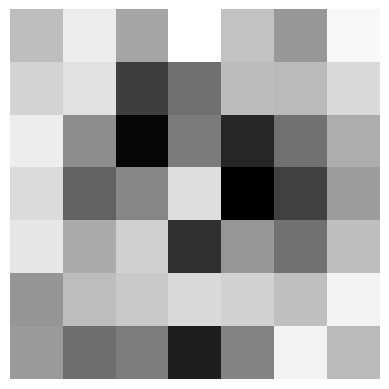

[[ 2.86020983e-01  7.64611442e-01  1.14091963e-01  1.06779640e+00
   3.26354069e-01  2.00944115e-02  9.49637190e-01]
 [ 4.85744215e-01  6.36025536e-01 -6.42162563e-01 -2.78124286e-01
   2.62826421e-01  2.48486968e-01  5.55449158e-01]
 [ 7.73960258e-01 -6.11650402e-02 -1.00674275e+00 -1.94690038e-01
  -7.82277804e-01 -2.73105147e-01  1.63538877e-01]
 [ 5.64048468e-01 -3.85322814e-01 -1.12149117e-01  5.98912150e-01
  -1.05755819e+00 -6.26616241e-01  5.16825817e-02]
 [ 6.97677727e-01  1.49781080e-01  4.55854378e-01 -7.21242802e-01
   1.01967509e-02 -2.71449955e-01  2.83737437e-01]
 [ 8.67650130e-04  2.73691224e-01  3.92931131e-01  5.44855051e-01
   4.73118008e-01  2.89985781e-01  8.57090272e-01]
 [ 3.75995914e-02 -2.95306071e-01 -1.92748347e-01 -8.50003649e-01
  -1.28756346e-01  8.53476733e-01  2.60587064e-01]]


In [611]:
weights.resize((resolution, resolution))
plt.imshow(weights, cmap='Greys_r')
plt.axis('off')
plt.show()

print(weights)